#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [3]:
## Use the Regression class defined in the previous lab
class regression:
  
  def __init__(self, name='reg'):
    self.name = name  

  def grad_update(self,w_old,lr,y,x):
    w=w_old-(1/x.shape[1])*lr*(x @ ((x.T @ w_old)-y))
    return w

  def error(self,w,y,x):
    return np.mean(np.power((y-x.T @ w),2))

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y
    
  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_init = np.random.uniform(-1, 1, (x.shape[0],1))
    w_old=w_init
    w_pred=w_init
    for i in range(20000):
      w_old=w_pred
      w_pred=self.grad_update(w_old,lr,y,x)
  
      err.append(self.error(w_pred,y,x))
      dev=np.abs(self.error(w_pred,y,x)-self.error(w_old,y,x))
          
      if dev<=1e-4:
        break

    return w_pred,err

Text(0.5, 1.0, '4-Degree Polynoimal')

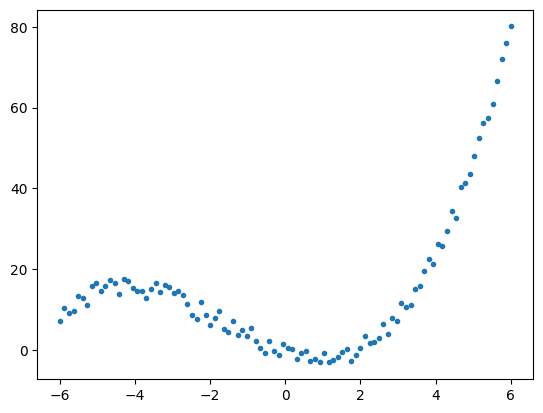

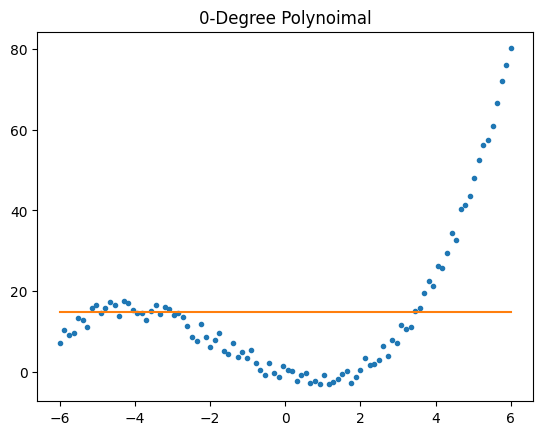

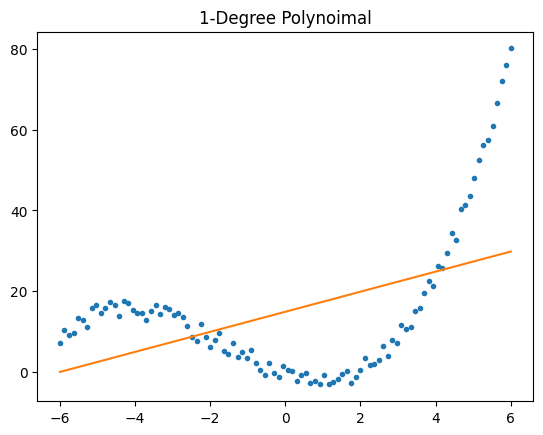

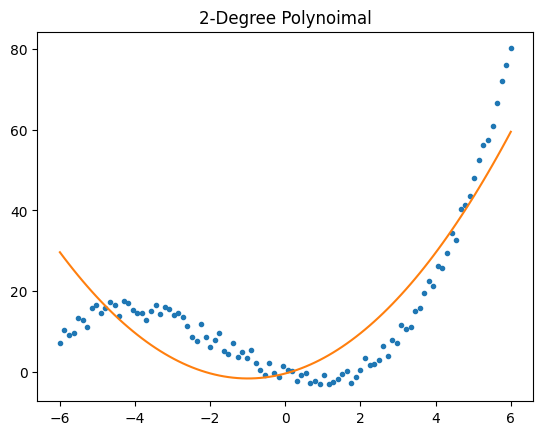

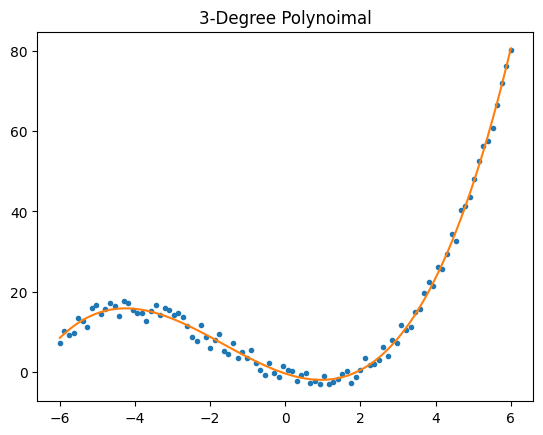

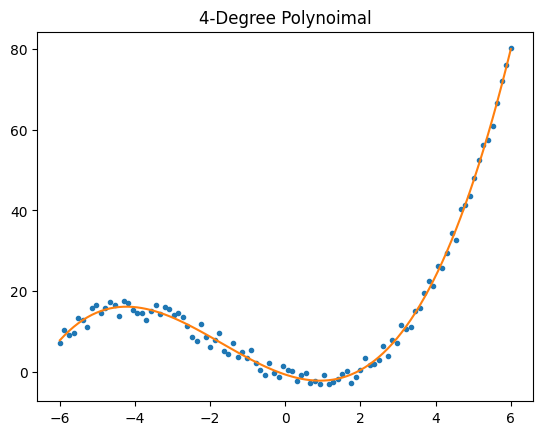

In [4]:
## Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]

w = np.array([[-3],[-3],[1.25],[0.25]]) ## Define Weights as per the given equation

## Function to transform the data into polynomial

def data_transform(X,degree):
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)
  return X_new


X = data_transform(x,3)

y = X.T @ w

y = y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 0
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynoimal')


# Write the code for degree 1 polynomial fitting
degree = 1
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynoimal')
# Write the code for degree 2 polynomial fitting
degree = 2
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynoimal')
# Write the code for degree 3 polynomial fitting
degree = 3
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynoimal')
# Write the code for degree 4 polynomial fitting
degree = 4
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynoimal')


(1, 100)
(1, 1)


Text(0.5, 1.0, '4-Degree Polynoimal')

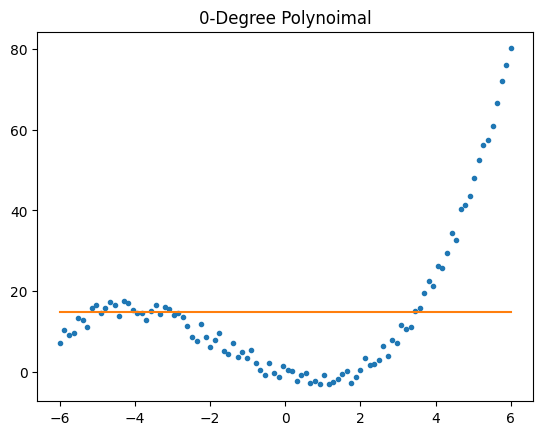

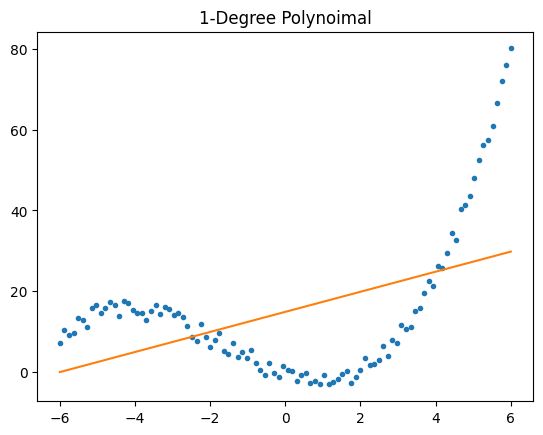

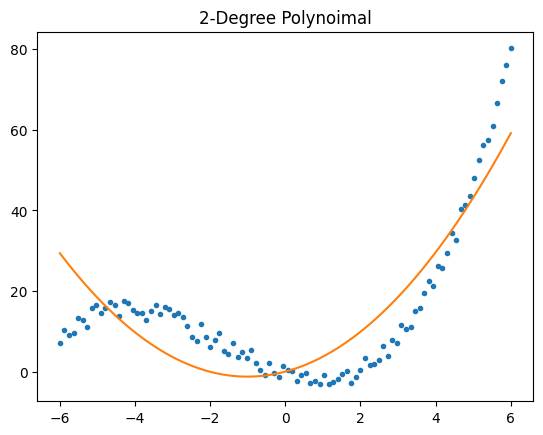

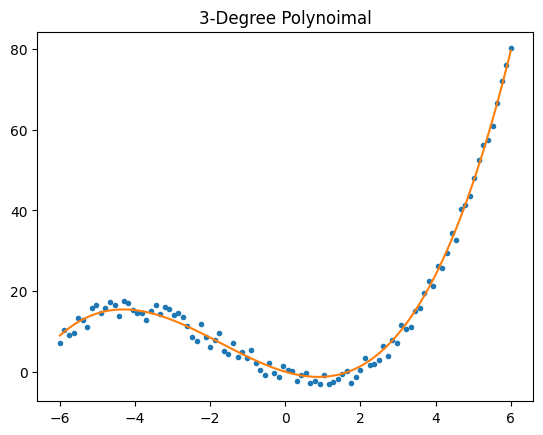

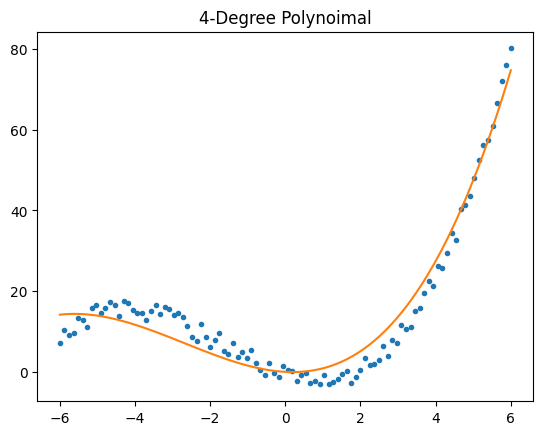

In [5]:
# By Gradient Descent 
x=np.linspace(-6,6,100)
x=x[np.newaxis,:]

degree = 0
X_0 = data_transform(x,degree)
w_mat, _=reg.Regression_grad_des(X_0,y, 0.1)
print(X_0.shape)
print(w_mat.shape)
y_pred=X_0.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynoimal')
## Write your code here
degree = 1
X_1 = data_transform(x,degree)
w_mat, _=reg.Regression_grad_des(X_1,y, 0.1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynoimal')


degree = 2
X_2 = data_transform(x,degree)
w_mat, _=reg.Regression_grad_des(X_2,y, 0.001)
y_pred=X_2.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynoimal')

degree = 3
X_3 = data_transform(x,degree)
w_mat, _=reg.Regression_grad_des(X_3,y, 0.0001)
y_pred=X_3.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynoimal')


degree = 4
X_4 = data_transform(x,degree)
w_mat, _=reg.Regression_grad_des(X_4,y, 0.000009)
y_pred=X_4.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynoimal')


# Linear Regression

  Generate the data as shown in the figure below


(1000,)


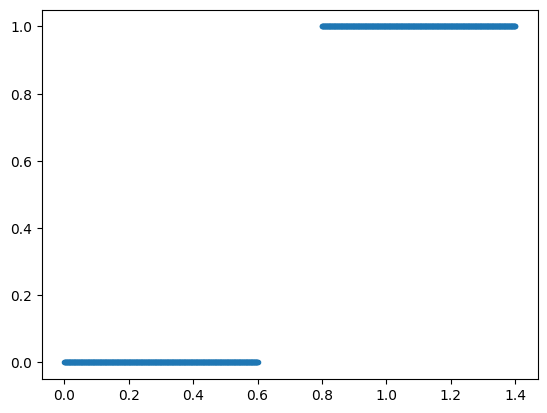

In [6]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt

l1=np.linspace(0,0.6,500)
l2=np.linspace(0.8,1.4,500)
X=np.concatenate((l1,l2))

y1=np.zeros(l1.shape)
y2=np.ones(l2.shape)
Y=np.concatenate((y1,y2))

print(X.shape)

plt.figure()
plt.plot(X,Y,'.')

  Use the Regression class defined in the previous lab to fit the curve

In [7]:
## Write your Code here
class regression:
  
  def __init__(self, name='reg'):
    self.name = name  

  def grad_update(self,w_old,lr,y,x):
    w=w_old-(1/x.shape[1])*lr*(x @ ((x.T @ w_old)-y))
    return w

  def error(self,w,y,x):
    return np.mean(np.power((y-x.T @ w),2))
    
  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_init = np.random.uniform(-1, 1, (x.shape[0],1))
    w_old=w_init
    w_pred=w_init
    for i in range(20000):
      w_old=w_pred
      w_pred=self.grad_update(w_old,lr,y,x)
  
      err.append(self.error(w_pred,y,x))
      dev=np.abs(self.error(w_pred,y,x)-self.error(w_old,y,x))
          
      if dev<=1e-4:
        break

    return w_pred,err

  Augment the Data and generate optimal weights

In [8]:
## Write your Code here
_X = X[:, np.newaxis].T
x_ones = np.ones((1, _X.shape[1]))
x_aug = np.concatenate((x_ones, _X))
print(x_aug.shape)
y_new = Y[:, np.newaxis]

linreg = regression()
w, err = linreg.Regression_grad_des(x_aug, y_new, 0.05)
print(w)

(2, 1000)
[[-0.07593028]
 [ 0.85072582]]


Using the optimal weights, fit the curve

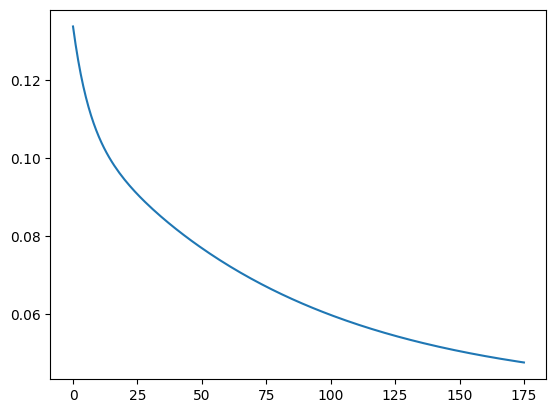

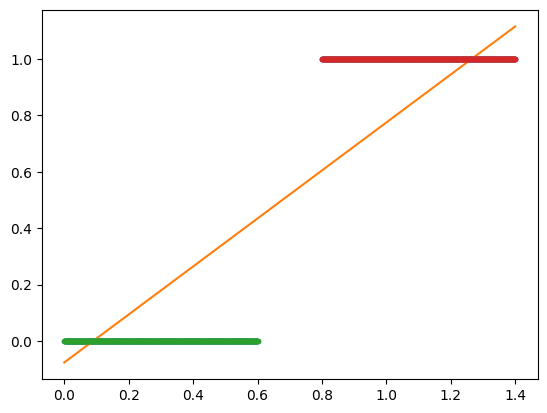

In [9]:
## Write your Code here
## Write your Code here
plt.figure()
plt.plot(err)
plt.show()

y_out = x_aug.T @ w

class_A = []
class_B = []

for i in range(len(X.T)):
    if y_out[i]>=0.5:
        class_A.append(X.T[i])
    else:
        class_B.append(X.T[i])

plt.figure()
plt.plot(X.T, Y,'.')
plt.plot(X.T, y_out)
plt.plot(class_B, np.zeros(len(class_B)), '.')
plt.plot(class_A, np.ones(len(class_A)), '.')

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

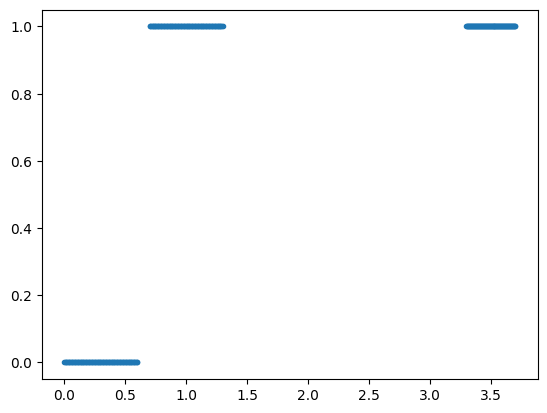

In [10]:
## Write your code here
c1 = np.linspace(0,0.6,100)
c2 = np.linspace(0.7,1.3,100)
c3 = np.linspace(3.3,3.7,100)

y1 = np.zeros(c1.shape)
y2 = np.ones(c2.shape)
y3 = np.ones(c3.shape)

X = np.concatenate((c1,c2,c3))
Y = np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(X.T, Y,'.')


[[0.12899376]
 [0.29502683]]


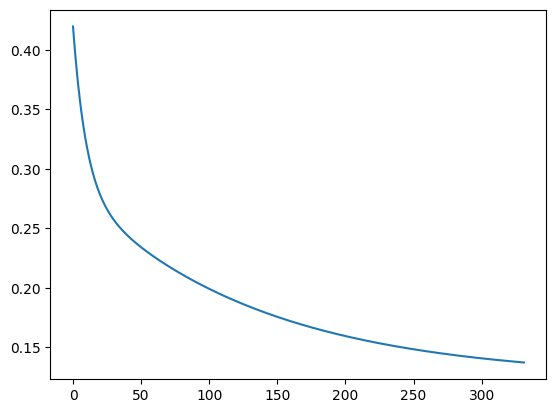

In [11]:
## Write your code here

_X = X[:, np.newaxis].T
x_ones = np.ones((1, _X.shape[1]))
x_aug = np.concatenate((x_ones, _X))
y_new = Y[:, np.newaxis]


linreg = regression()
w, err = linreg.Regression_grad_des(x_aug, y_new, 0.01)

print(w)

plt.figure()
plt.plot(err)

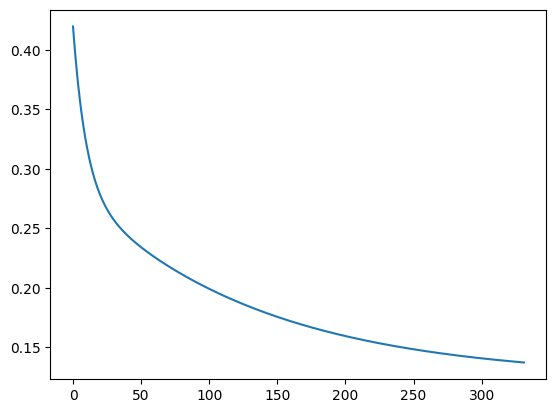

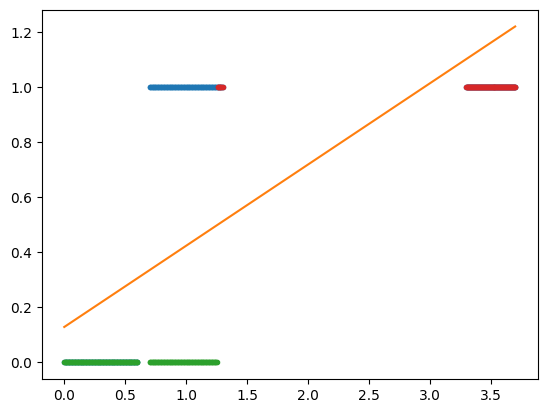

In [12]:
plt.figure()
plt.plot(err)
plt.show()

y_out = x_aug.T @ w

class_A = []
class_B = []

for i in range(len(X.T)):
    if y_out[i]>=0.5:
        class_A.append(X.T[i])
    else:
        class_B.append(X.T[i])

plt.figure()
plt.plot(X.T, Y,'.')
plt.plot(X.T, y_out)
plt.plot(class_B, np.zeros(len(class_B)), '.')
plt.plot(class_A, np.ones(len(class_A)), '.')

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

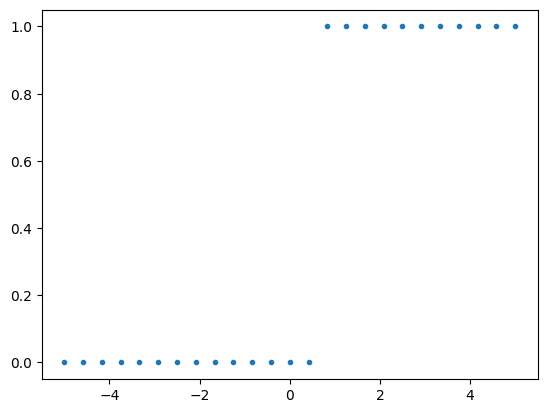

In [13]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [14]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):
  z = w0 + w1[i]*x
  z_logistic = 1/(1 + np.exp(-z))

  MSE = np.sum((z_logistic - y)**2)/(2*x.shape[0])
  cost_fn_mse.append(MSE)

  LOG = -np.sum(y*np.log(z_logistic + 1e-5) + (1-y)*np.log(1-z_logistic+ 1e-5))/(x.shape[0])
  cost_fn_logis.append(LOG)


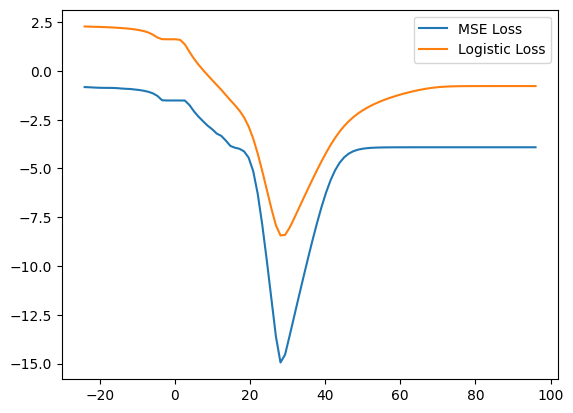

In [15]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

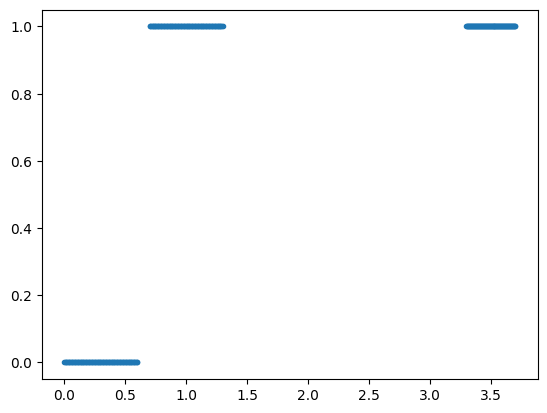

In [16]:
## Write your Code here
c1 = np.linspace(0,0.6,100)
c2 = np.linspace(0.7,1.3,100)
c3 = np.linspace(3.3,3.7,100)

y1 = np.zeros(c1.shape)
y2 = np.ones(c2.shape)
y3 = np.ones(c3.shape)

X = np.concatenate((c1,c2,c3))
Y = np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(X.T, Y,'.')

Define a Logistic Regression class

In [17]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    # write code here
    op = 1/(1 + np.exp(-(x.T @ w_old)))
    return op

  def grad_update(self,w_old,lr,y,x):
    # write code here
    w = w_old - (2*lr/x.shape[1])*(x @ ( (self.logis(x, w_old)-y )))
    return w

  def error(self,w,y,x):

    LOG = self.logis(x,w)
    ret = -np.sum(y*np.log(LOG + 1e-5) + (1-y)*np.log(1-LOG+ 1e-5))/(x.shape[0])
    return ret

  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_init = np.random.uniform(-1, 1, (x.shape[0],1))
    w_old=w_init
    w_pred=w_init
    for i in range(20000):
      w_old=w_pred
      w_pred=self.grad_update(w_old,lr,y,x)
  
      err.append(self.error(w_pred,y,x))
      dev=np.abs(self.error(w_pred,y,x)-self.error(w_old,y,x))
          
      if dev<=1e-4:
        break

    return w_pred,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

[[-5.33404539]
 [ 8.36883505]]


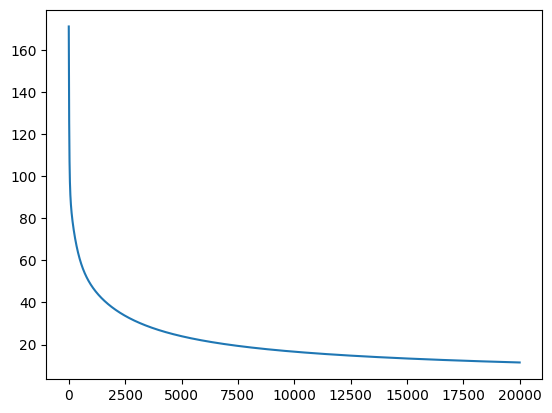

In [18]:
## Write your code here
_X = X[:, np.newaxis].T
x_ones = np.ones((1, _X.shape[1]))
x_aug = np.concatenate((x_ones, _X))
y_new = Y[:, np.newaxis]

linreg = logis_regression()
w, err = linreg.Regression_grad_des(x_aug, y_new, 0.01)

print(w)

plt.figure()
plt.plot(err)

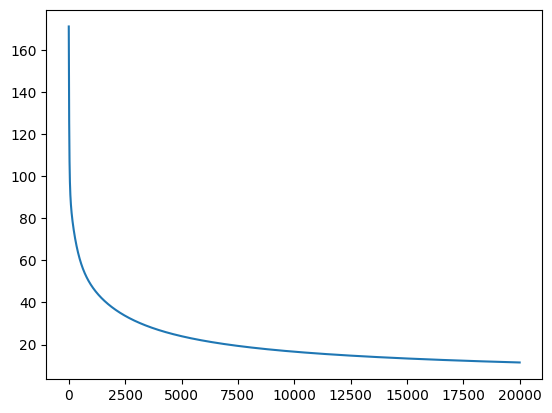

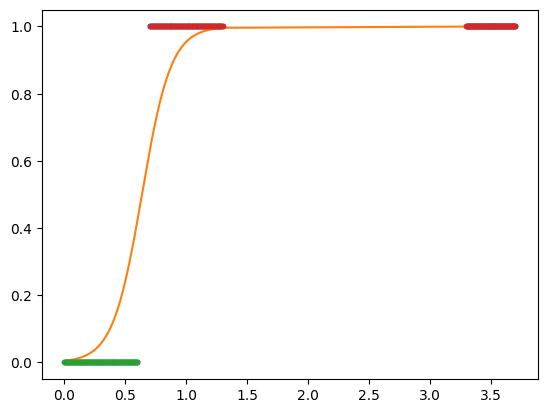

In [19]:
plt.figure()
plt.plot(err)
plt.show()

y_out = 1/(1 + np.exp(-(x_aug.T @ w)))

class_A = []
class_B = []

for i in range(len(X.T)):
    if y_out[i]>=0.5:
        class_A.append(X.T[i])
    else:
        class_B.append(X.T[i])

plt.figure()
plt.plot(X.T, Y,'.')
plt.plot(X.T, y_out)
plt.plot(class_B, np.zeros(len(class_B)), '.')
plt.plot(class_A, np.ones(len(class_A)), '.')

# Classification of circularly separated data using logistic regression



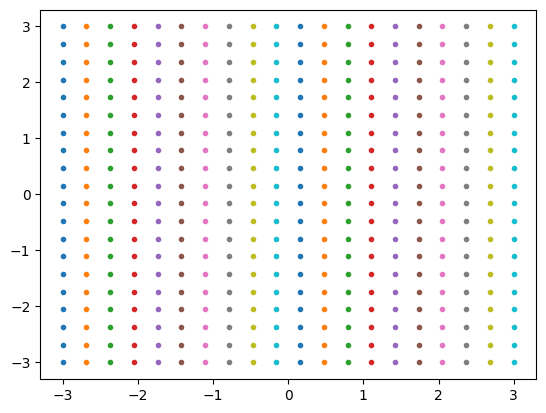

In [20]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')

  Using the above data generate circular data

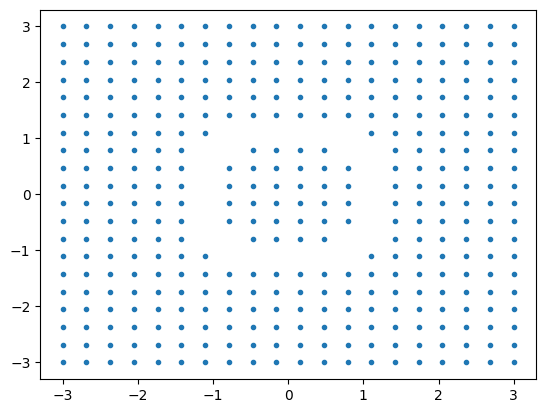

In [21]:
# Write code here
x1 = x11.flatten()
x1 = x1[:, np.newaxis]
x2 = x22.flatten() 
x2 = x2[:, np.newaxis]
x = np.concatenate((x1, x2), axis=1)

inner_points = np.where((x[:,0]**2 + x[:,1]**2) <= 0.9)
outer_points = np.where((x[:,0]**2 + x[:,1]**2) >= 2.0)

x_inner = x[inner_points[0],:]
x_outer = x[outer_points[0],:]

X = np.concatenate((x_inner, x_outer))
plt.figure()
plt.plot(X[:,0], X[:,1], '.')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

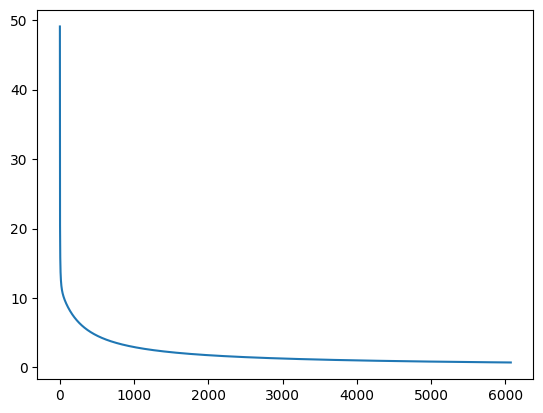

In [22]:
# perform logistic regression
y_inner = np.zeros((x_inner.shape[0]))
y_outer = np.ones((x_outer.shape[0]))
Y = np.concatenate((y_inner, y_outer))
y_new = Y[:, np.newaxis]

x_sq = (X.T)**2
x_ones = np.ones((1, X.shape[0]))
x_aug = np.concatenate((x_ones, x_sq), axis=0)

reg = logis_regression()
w,err = reg.Regression_grad_des(x_aug, y_new, 0.1)
plt.figure()
plt.plot(err)
plt.show()


Plot classification using 0.5 as threshold

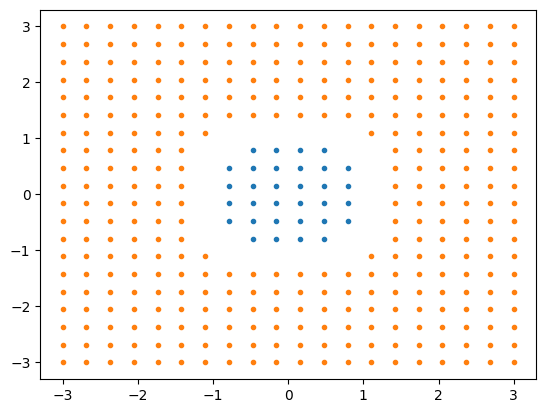

In [23]:
#write code here
y_pred = reg.logis(x_aug,w)

inner, _ = np.where(y_pred < 0.5)
outer, _ = np.where(y_pred >= 0.5)

x_in_plt = X[inner,:]
x_out_plt = X[outer,:]

plt.figure()
plt.plot(x_in_plt[:,0], x_in_plt[:,1], '.')
plt.plot(x_out_plt[:,0], x_out_plt[:,1], '.')
plt.show()

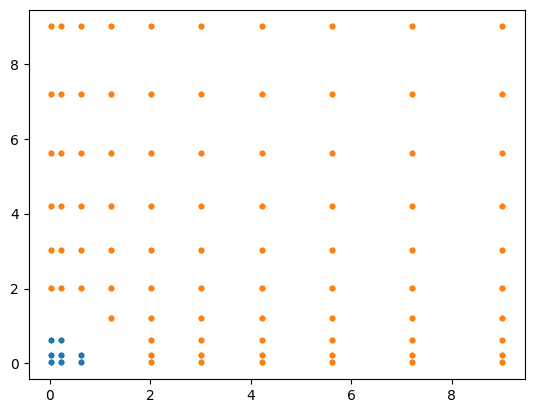

In [34]:
plt.figure()

x_sq_in = x_in_plt **2
x_sq_out = x_out_plt **2
plt.plot(x_sq_in[:,0], x_sq_in[:,1], '.')
plt.plot(x_sq_out[:,0], x_sq_out[:,1], '.')
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


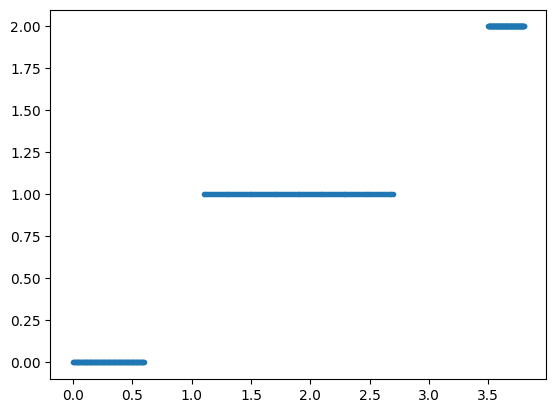

In [25]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [26]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)


In [27]:
# plot for classification
def plot_op(x,y_pred):

  ind0,_=np.where(y_pred<0.5)
  ind1,_=np.where(y_pred>=0.5)
  x0=x[ind0,:]
  x1=x[ind1,:]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  

[[-6.07820149]
 [ 1.3290377 ]
 [ 5.64990261]]


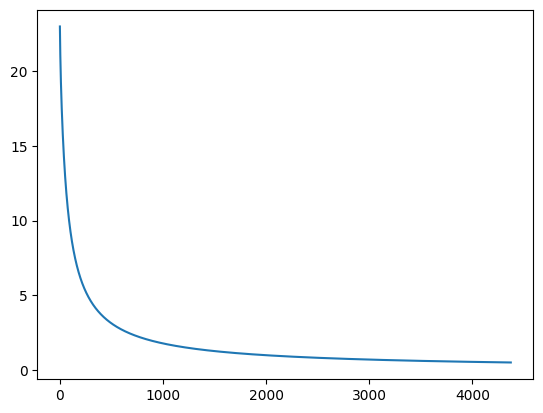

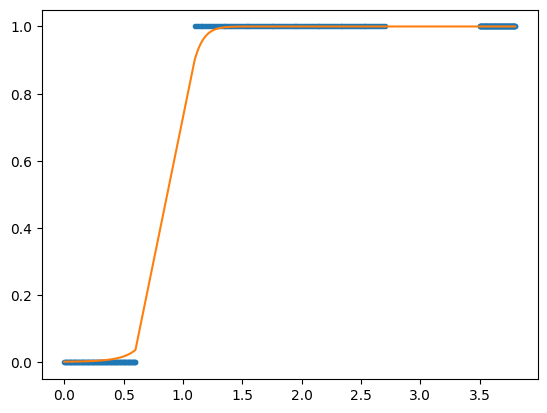

In [28]:
def classify(y):
    ret = np.zeros(y.shape)
    for i in range(len(y)):
        if y[i] == 0:
            ret[i] = 0
        else:
            ret[i] = 1

    return ret

y_class = classify(y)
_y = y_class[:,np.newaxis]

reg = logis_regression()

w,err = reg.Regression_grad_des(x_aug, _y, 0.1)

print(w)

plt.figure()
plt.plot(err)
plt.show()

y0_pred = reg.logis(x_aug, w)

plt.figure()
plt.plot(x, _y, '.')
plt.plot(x, y0_pred[:,0])
    

[[ 10.22601514]
 [-15.87964218]
 [  4.04168733]]


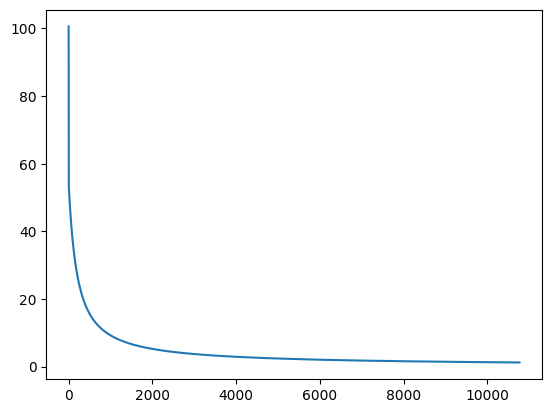

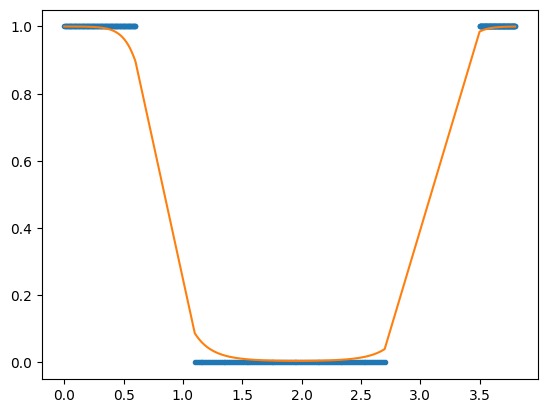

In [29]:
# take class 1 as '0' and other to '1'
## Write your code here
def classify(y):
    ret = np.zeros(y.shape)
    for i in range(len(y)):
        if y[i] == 1:
            ret[i] = 0
        else:
            ret[i] = 1

    return ret

y_class = classify(y)
_y = y_class[:,np.newaxis]

reg = logis_regression()

w,err = reg.Regression_grad_des(x_aug, _y, 0.1)

print(w)

plt.figure()
plt.plot(err)
plt.show()

y1_pred = reg.logis(x_aug, w)

plt.figure()
plt.plot(x, _y, '.')
plt.plot(x, y1_pred[:,0])

[[ 5.75555271]
 [ 4.84186461]
 [-2.21372665]]


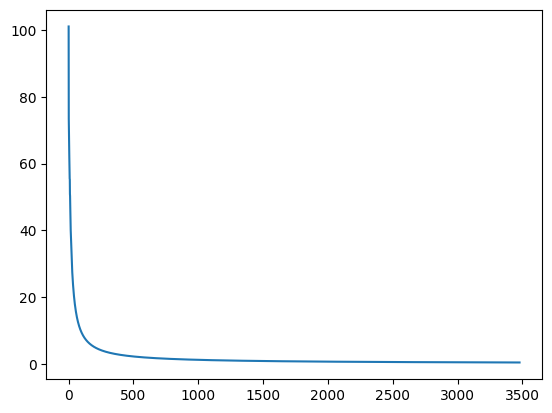

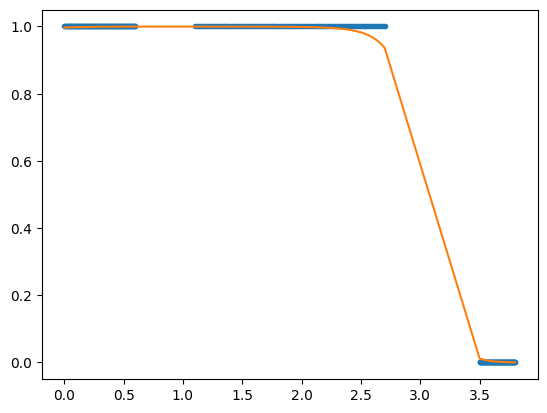

In [30]:
# Take class 2 as '0' and other to '1'
## Write your code here
def classify(y):
    ret = np.zeros(y.shape)
    for i in range(len(y)):
        if y[i] == 2:
            ret[i] = 0
        else:
            ret[i] = 1

    return ret

y_class = classify(y)
_y = y_class[:,np.newaxis]

reg = logis_regression()

w,err = reg.Regression_grad_des(x_aug, _y, 0.1)

print(w)

plt.figure()
plt.plot(err)
plt.show()

y2_pred = reg.logis(x_aug, w)

plt.figure()
plt.plot(x, _y, '.')
plt.plot(x, y2_pred[:,0])

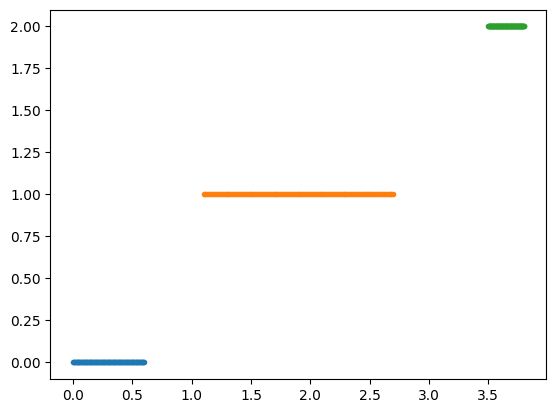

In [31]:
# final classification
## Write your code here
class_0,_ = np.where(y0_pred < 0.5)
class_0 = x[class_0]

class_1,_ = np.where(y1_pred < 0.5)
class_1 = x[class_1]

class_2,_ = np.where(y2_pred < 0.5)
class_2 = x[class_2]

plt.figure()
plt.plot(class_0, np.zeros(class_0.shape), '.')
plt.plot(class_1, np.ones(class_1.shape), '.')
plt.plot(class_2, np.tile([2], class_2.shape), '.')
plt.show()